[View in Colaboratory](https://colab.research.google.com/github/madeleinelee/learning/blob/madeleinelee-patch-1/Copy_of_ex06_regulizers.ipynb)

## 確認套件已經安裝 & Get data

In [0]:
from __future__ import print_function
!pip install -q keras
import keras
from google.colab import files
import numpy as np
from past.builtins import execfile
import numpy as np
import os

from keras.utils import np_utils
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

Using TensorFlow backend.


## 請將本機端的資料 "pkgo_city66_cass5_v1.csv" 上傳到 colab 環境

In [0]:
if not os.path.exists("pkgo_city66_class5_v1.csv"):
  uploaded = files.upload()

def readInput(file):
  ''' Read input files '''
  my_data = np.genfromtxt(file, delimiter=',',skip_header=1)

  ''' The first column to the 199th column is used as input features '''
  X_train = my_data[:,0:200]
  X_train = X_train.astype('float32')

  ''' The 200-th column is the answer '''
  y_train = my_data[:,200]
  y_train = y_train.astype('int')

  ''' Convert to one-hot encoding '''
  Y_train = np_utils.to_categorical(y_train,5)

  ''' Shuffle training data '''
  X_train,Y_train = shuffle(X_train,Y_train,random_state=100)
  return X_train, Y_train

X_train, Y_train = readInput(file="pkgo_city66_class5_v1.csv")

## 開始建立第一個模型 
### (資料已經先替各位做過簡單的預處理囉)

In [0]:
''' Import keras to build a DL model '''
from keras.models import Model
from keras.layers import Dense, Activation, Input
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
from keras.regularizers import l1, l2, l1_l2
import keras.backend as K

Building a model with regularizer L1: 0, L2: 0
Train on 1652 samples, validate on 184 samples
Epoch 1/30
1652/1652 [==============================] - 0s 296us/step - loss: 1.8449 - acc: 0.4879 - val_loss: 1.3052 - val_acc: 0.5870
Epoch 2/30
1652/1652 [==============================] - 0s 161us/step - loss: 1.2449 - acc: 0.5702 - val_loss: 1.1757 - val_acc: 0.6250
Epoch 3/30
1652/1652 [==============================] - 0s 162us/step - loss: 1.0917 - acc: 0.6241 - val_loss: 0.9176 - val_acc: 0.6685
Epoch 4/30
1652/1652 [==============================] - 0s 151us/step - loss: 1.0159 - acc: 0.6416 - val_loss: 0.9909 - val_acc: 0.6685
Epoch 5/30
1652/1652 [==============================] - 0s 157us/step - loss: 1.0104 - acc: 0.6429 - val_loss: 0.9520 - val_acc: 0.6467
Epoch 6/30
1652/1652 [==============================] - 0s 157us/step - loss: 0.9622 - acc: 0.6507 - val_loss: 1.0084 - val_acc: 0.5978
Epoch 7/30
1652/1652 [==============================] - 0s 155us/step - loss: 0.9488 - acc

1652/1652 [==============================] - 0s 155us/step - loss: 0.7518 - acc: 0.7391 - val_loss: 0.9020 - val_acc: 0.7120
Epoch 16/30
1652/1652 [==============================] - 0s 154us/step - loss: 0.7335 - acc: 0.7397 - val_loss: 0.7981 - val_acc: 0.7283
Epoch 17/30
1652/1652 [==============================] - 0s 158us/step - loss: 0.7155 - acc: 0.7603 - val_loss: 0.7800 - val_acc: 0.7554
Epoch 18/30
1652/1652 [==============================] - 0s 160us/step - loss: 0.7215 - acc: 0.7427 - val_loss: 0.7767 - val_acc: 0.7065
Epoch 19/30
1652/1652 [==============================] - 0s 154us/step - loss: 0.6626 - acc: 0.7700 - val_loss: 0.7608 - val_acc: 0.7283
Epoch 20/30
1652/1652 [==============================] - 0s 158us/step - loss: 0.6460 - acc: 0.7748 - val_loss: 0.8237 - val_acc: 0.7500
Epoch 21/30
1652/1652 [==============================] - 0s 165us/step - loss: 0.6413 - acc: 0.7760 - val_loss: 0.7865 - val_acc: 0.7337
Epoch 22/30
1652/1652 [==============================

Epoch 30/30
1652/1652 [==============================] - 0s 157us/step - loss: 0.4753 - acc: 0.8354 - val_loss: 0.8165 - val_acc: 0.7174
Building a model with regularizer L1: 0, L2: 0.005
Train on 1652 samples, validate on 184 samples
Epoch 1/30
1652/1652 [==============================] - 0s 297us/step - loss: 2.5945 - acc: 0.4806 - val_loss: 1.7930 - val_acc: 0.6033
Epoch 2/30
1652/1652 [==============================] - 0s 172us/step - loss: 1.7270 - acc: 0.5672 - val_loss: 1.4741 - val_acc: 0.6196
Epoch 3/30
1652/1652 [==============================] - 0s 174us/step - loss: 1.5606 - acc: 0.5854 - val_loss: 1.4940 - val_acc: 0.5870
Epoch 4/30
1652/1652 [==============================] - 0s 174us/step - loss: 1.4854 - acc: 0.6090 - val_loss: 1.3294 - val_acc: 0.6522
Epoch 5/30
1652/1652 [==============================] - 0s 175us/step - loss: 1.4531 - acc: 0.6192 - val_loss: 1.2983 - val_acc: 0.6576
Epoch 6/30
1652/1652 [==============================] - 0s 175us/step - loss: 1.3830 

1652/1652 [==============================] - 0s 170us/step - loss: 1.2318 - acc: 0.6580 - val_loss: 1.1238 - val_acc: 0.6739
Epoch 14/30
1652/1652 [==============================] - 0s 163us/step - loss: 1.1904 - acc: 0.6889 - val_loss: 1.1562 - val_acc: 0.6685
Epoch 15/30
1652/1652 [==============================] - 0s 172us/step - loss: 1.1837 - acc: 0.6659 - val_loss: 1.1760 - val_acc: 0.6685
Epoch 16/30
1652/1652 [==============================] - 0s 165us/step - loss: 1.1610 - acc: 0.6774 - val_loss: 1.0786 - val_acc: 0.6739
Epoch 17/30
1652/1652 [==============================] - 0s 173us/step - loss: 1.1595 - acc: 0.6780 - val_loss: 1.2046 - val_acc: 0.6630
Epoch 18/30
1652/1652 [==============================] - 0s 181us/step - loss: 1.1377 - acc: 0.6786 - val_loss: 1.1157 - val_acc: 0.6576
Epoch 19/30
1652/1652 [==============================] - 0s 180us/step - loss: 1.1299 - acc: 0.6762 - val_loss: 1.0511 - val_acc: 0.6739
Epoch 20/30
1652/1652 [==============================

Epoch 27/30
1652/1652 [==============================] - 0s 176us/step - loss: 1.0519 - acc: 0.6919 - val_loss: 1.1207 - val_acc: 0.6685
Epoch 28/30
1652/1652 [==============================] - 0s 172us/step - loss: 1.0556 - acc: 0.7022 - val_loss: 1.0455 - val_acc: 0.7174
Epoch 29/30
1652/1652 [==============================] - 0s 178us/step - loss: 1.0515 - acc: 0.7028 - val_loss: 1.0769 - val_acc: 0.7065
Epoch 30/30
1652/1652 [==============================] - 0s 169us/step - loss: 1.0515 - acc: 0.7070 - val_loss: 1.0432 - val_acc: 0.6957
Building a model with regularizer L1: 0, L2: 0.05
Train on 1652 samples, validate on 184 samples
Epoch 1/30
1652/1652 [==============================] - 1s 335us/step - loss: 9.6194 - acc: 0.4958 - val_loss: 4.7449 - val_acc: 0.5598
Epoch 2/30
1652/1652 [==============================] - 0s 161us/step - loss: 3.8418 - acc: 0.5357 - val_loss: 3.1551 - val_acc: 0.5978
Epoch 3/30
1652/1652 [==============================] - 0s 173us/step - loss: 2.912

1652/1652 [==============================] - 0s 174us/step - loss: 1.5861 - acc: 0.5781 - val_loss: 1.4762 - val_acc: 0.6196
Epoch 11/30
1652/1652 [==============================] - 0s 164us/step - loss: 1.5324 - acc: 0.5787 - val_loss: 1.4232 - val_acc: 0.6250
Epoch 12/30
1652/1652 [==============================] - 0s 162us/step - loss: 1.4947 - acc: 0.5878 - val_loss: 1.4389 - val_acc: 0.6141
Epoch 13/30
1652/1652 [==============================] - 0s 163us/step - loss: 1.4613 - acc: 0.5775 - val_loss: 1.3552 - val_acc: 0.6304
Epoch 14/30
1652/1652 [==============================] - 0s 175us/step - loss: 1.4280 - acc: 0.5823 - val_loss: 1.3444 - val_acc: 0.6250
Epoch 15/30
1652/1652 [==============================] - 0s 164us/step - loss: 1.3997 - acc: 0.5793 - val_loss: 1.3523 - val_acc: 0.6196
Epoch 16/30
1652/1652 [==============================] - 0s 166us/step - loss: 1.3909 - acc: 0.5811 - val_loss: 1.3241 - val_acc: 0.5815
Epoch 17/30
1652/1652 [==============================

1652/1652 [==============================] - 0s 184us/step - loss: 1.3260 - acc: 0.5781 - val_loss: 1.2484 - val_acc: 0.5924
Epoch 25/30
1652/1652 [==============================] - 0s 183us/step - loss: 1.3228 - acc: 0.5811 - val_loss: 1.2485 - val_acc: 0.6033
Epoch 26/30
1652/1652 [==============================] - 0s 181us/step - loss: 1.3156 - acc: 0.5684 - val_loss: 1.2261 - val_acc: 0.6304
Epoch 27/30
1652/1652 [==============================] - 0s 184us/step - loss: 1.3068 - acc: 0.5878 - val_loss: 1.2393 - val_acc: 0.6033
Epoch 28/30
1652/1652 [==============================] - 0s 176us/step - loss: 1.3057 - acc: 0.5860 - val_loss: 1.2201 - val_acc: 0.6359
Epoch 29/30
1652/1652 [==============================] - 0s 187us/step - loss: 1.3031 - acc: 0.5823 - val_loss: 1.2276 - val_acc: 0.6250
Epoch 30/30
1652/1652 [==============================] - 0s 174us/step - loss: 1.2944 - acc: 0.5872 - val_loss: 1.2318 - val_acc: 0.6141
Building a model with regularizer L1: 0.005, L2: 0
Tr

1652/1652 [==============================] - 0s 180us/step - loss: 2.6431 - acc: 0.5781 - val_loss: 2.4486 - val_acc: 0.6033
Epoch 8/30
1652/1652 [==============================] - 0s 180us/step - loss: 2.4346 - acc: 0.5726 - val_loss: 2.3533 - val_acc: 0.5924
Epoch 9/30
1652/1652 [==============================] - 0s 170us/step - loss: 2.2716 - acc: 0.5841 - val_loss: 2.0958 - val_acc: 0.6196
Epoch 10/30
1652/1652 [==============================] - 0s 175us/step - loss: 2.1014 - acc: 0.5950 - val_loss: 2.0079 - val_acc: 0.6359
Epoch 11/30
1652/1652 [==============================] - 0s 179us/step - loss: 1.9918 - acc: 0.5944 - val_loss: 1.8790 - val_acc: 0.6141
Epoch 12/30
1652/1652 [==============================] - 0s 185us/step - loss: 1.8916 - acc: 0.5841 - val_loss: 1.7905 - val_acc: 0.6467
Epoch 13/30
1652/1652 [==============================] - 0s 188us/step - loss: 1.8078 - acc: 0.5926 - val_loss: 1.7127 - val_acc: 0.6359
Epoch 14/30
1652/1652 [==============================] 

1652/1652 [==============================] - 0s 179us/step - loss: 1.4909 - acc: 0.5969 - val_loss: 1.4090 - val_acc: 0.6141
Epoch 21/30
1652/1652 [==============================] - 0s 183us/step - loss: 1.4666 - acc: 0.5950 - val_loss: 1.3585 - val_acc: 0.6304
Epoch 22/30
1652/1652 [==============================] - 0s 189us/step - loss: 1.4454 - acc: 0.5908 - val_loss: 1.3446 - val_acc: 0.6250
Epoch 23/30
1652/1652 [==============================] - 0s 178us/step - loss: 1.4200 - acc: 0.5950 - val_loss: 1.3220 - val_acc: 0.6359
Epoch 24/30
1652/1652 [==============================] - 0s 180us/step - loss: 1.4020 - acc: 0.5962 - val_loss: 1.3143 - val_acc: 0.6196
Epoch 25/30
1652/1652 [==============================] - 0s 188us/step - loss: 1.3853 - acc: 0.6005 - val_loss: 1.2934 - val_acc: 0.6250
Epoch 26/30
1652/1652 [==============================] - 0s 182us/step - loss: 1.3752 - acc: 0.6035 - val_loss: 1.2746 - val_acc: 0.6304
Epoch 27/30
1652/1652 [==============================

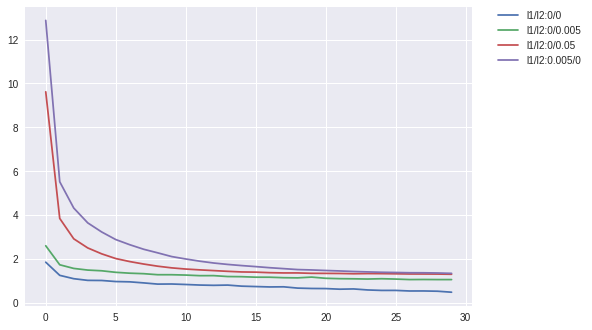

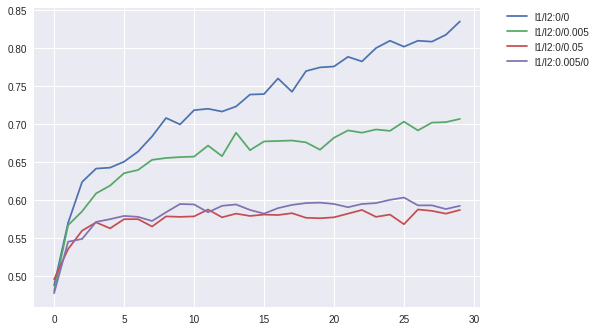

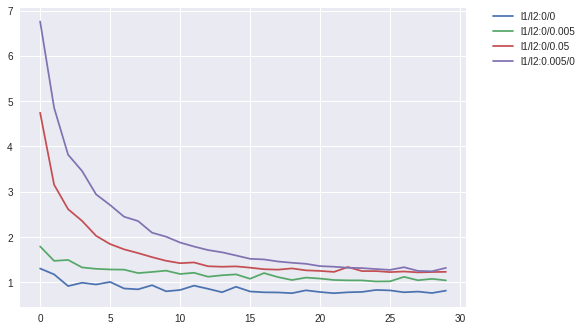

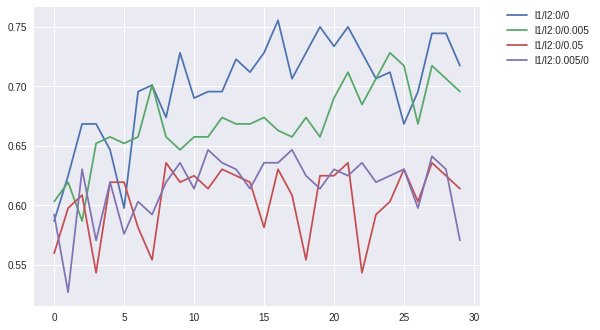

In [0]:
#@title Regulizers { vertical-output: true, display-mode: "both" }
l1 = [0, 0, 0, 0.005] #@param {type:"raw"}
l2 = [0, 0.005, 0.05, 0] #@param {type:"raw"}
K.clear_session()

train_loss_list, train_acc_list = [], []
valid_loss_list, valid_acc_list = [], []

for l1n, l2n in zip(l1, l2):
  print('Building a model with regularizer L1: %g, L2: %g' % (l1n, l2n))
  x_input = Input(shape = [X_train.shape[1]])

  x = Dense(128, kernel_regularizer=l1_l2(l1 = l1n, l2 = l2n))(x_input)
  x = Activation('relu')(x)

  x = Dense(256, kernel_regularizer=l1_l2(l1 = l1n, l2 = l2n))(x)
  x = Activation('relu')(x)

  x = Dense(5, kernel_regularizer=l1_l2(l1 = l1n, l2 = l2n))(x)
  out = Activation('softmax')(x)

  model = Model(inputs=[x_input], outputs=[out])

  optim = Adam(lr = 0.001)

  model.compile(loss='categorical_crossentropy',
          optimizer=optim,
          metrics=['accuracy'])
  #model.summary()

  batch_size = 16
  epochs = 30

  history = model.fit(X_train, Y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                shuffle=True,
                validation_split=0.1)

  loss	= history.history.get('loss')
  acc 	= history.history.get('acc')

  val_loss = history.history.get('val_loss')
  val_acc = history.history.get('val_acc')
  
  train_loss_list.append(loss)
  valid_loss_list.append(val_loss)
  train_acc_list.append(acc)
  valid_acc_list.append(val_acc)

  
list_len = len(train_loss_list)

# training loss
for i in np.arange(list_len):
  plt.plot(np.arange(len(train_loss_list[i])), train_loss_list[i], label = 'l1/l2:%g/%g' % (l1[i], l2[i]))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# training acc
for i in np.arange(list_len):
  plt.plot(np.arange(len(train_acc_list[i])), train_acc_list[i], label = 'l1/l2:%g/%g' % (l1[i], l2[i]))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# valid loss
for i in np.arange(list_len):
  plt.plot(np.arange(len(valid_loss_list[i])), valid_loss_list[i], label = 'l1/l2:%g/%g' % (l1[i], l2[i]))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


# valid acc
for i in np.arange(list_len):
  plt.plot(np.arange(len(valid_acc_list[i])), valid_acc_list[i], label = 'l1/l2:%g/%g' % (l1[i], l2[i]))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

